<h1 style="color:rgb(0,120,170)">Assignment 2: Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(210,90,80)">Exercise 1 (25 points):</h3>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac 1 n \sum_{i=1}^{n} x_{i}$.

########## YOUR SOLUTION HERE ##########

----


likelihood function:

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} P(x_i; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_i} e^{-\lambda}}{x_i!}
$$

Computing with log-likelihood function


$$
\log(\mathcal{L}(\lambda)) = \sum_{i=1}^{n} \log\left(\frac{\lambda^{x_i} e^{-\lambda}}{x_i!}\right) = \sum_{i=1}^{n} \left(x_i \log(\lambda) - \lambda - \log(x_i!)\right)
$$

We can simplify the equation because there is a constant part and it will not affect the result of the equation.

$$
\log(\mathcal{L}(\lambda)) = \sum_{i=1}^{n} x_i \log(\lambda) - n\lambda
$$

To find the maximum likelihood, we should take the derivation according to lambda and make it equal to zero.

$$
\frac{d}{d\lambda} \log(\mathcal{L}(\lambda)) = \frac{d}{d\lambda} \left(\sum_{i=1}^{n} x_i \log(\lambda) - n\lambda\right) = \sum_{i=1}^{n} \frac{x_i}{\lambda} - n
$$

When we make the derivation to equal it to zero we get;

$$
\sum_{i=1}^{n} \frac{x_i}{\lambda} = n
$$

$$
\lambda = \frac{1}{n} \sum_{i=1}^{n} x_i
$$


-------


In the next exercises, we will plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [2]:
%pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 24.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 18.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,0
0,11
1,10
2,11
3,9
4,12


In [3]:
X = data_df.values[:,0]

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


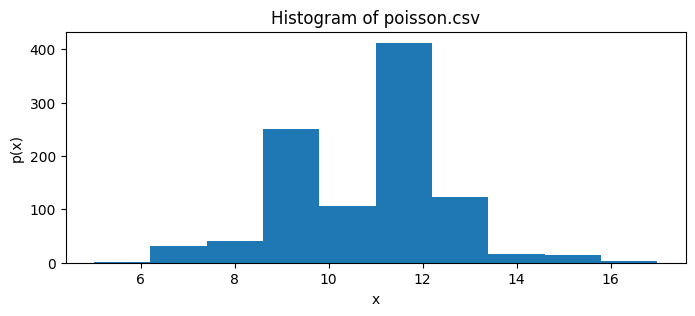

In [4]:
plt.figure(figsize=(8,3))
plt.hist(X)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [5]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [6]:
#test the function
lam_set = np.linspace(1,50,99)
print(X.shape)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

(1000,)
lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>

Implement the `estimator_formula` function returning the analytic solution for lambda-hat

In [7]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
    lam_max_formula = sum(X) / len(X)  
    return lam_max_formula

In [8]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

Implement the `estimator_data` function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

In [9]:
def estimator_support(X, lam_set):
    
    loglikelih = [loglikelihood(X, lami) for lami in lam_set]
    
    lam_max_index = np.argmax(loglikelih)
    lam_max = lam_set[lam_max_index]
    
    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    return loglikelih, ln_min, ln_max, lam_max


In [10]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Plot the loglikelihood function over `lam_set`
* Mark the maxima in the plot according to `estimator_formula` and `estimator_support`

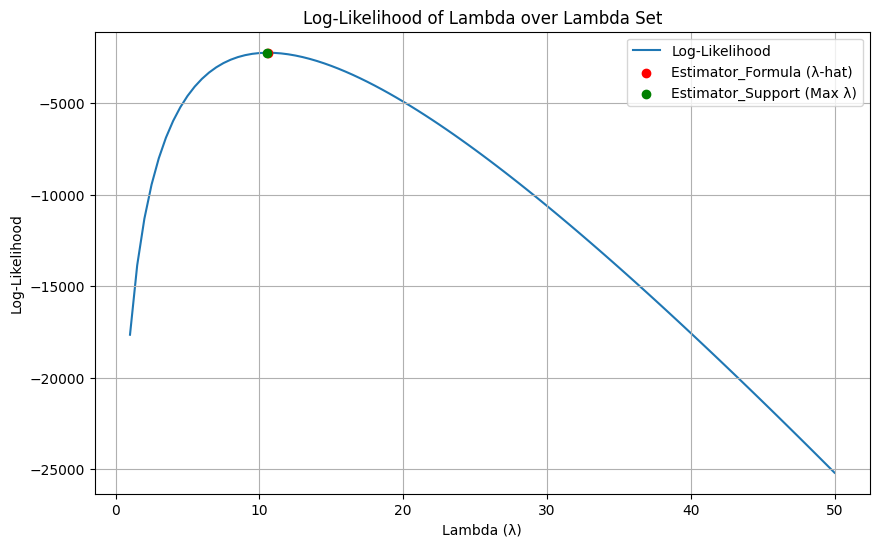

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(lam_set, loglikelih, label='Log-Likelihood', zorder=1)
plt.scatter([lam_max_formula], [loglikelihood(X, lam_max_formula)], color='red', label='Estimator_Formula (λ-hat)', zorder=2)
plt.scatter([lam_max], [loglikelihood(X, lam_max)], color='green', label='Estimator_Support (Max λ)', zorder=3)

plt.title('Log-Likelihood of Lambda over Lambda Set')
plt.xlabel('Lambda (λ)')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color:rgb(208,90,80)">Exercise 5 (5 points)</h3>

* Explain and discuss the result in your own words. Where is the maximum?

########## YOUR SOLUTION HERE ##########

----

Estimator_Formula (λ-hat): The value of λ-hat, calculated using the estimator_formula function, is the arithmetic mean of the dataset. This value is a simple estimate of the most suitable λ value for the dataset and is based on the maximum likelihood estimation (MLE).

Estimator_Support (Max λ): The value of λ that has the maximum value of the log-likelihood function, found using the estimator_support function. This value represents the λ value among those in the lam_set that best explains the dataset and is the point at which the log-likelihood function is maximized.

Location of Maximum: The maximum of the log-likelihood function is found at the point marked by Estimator_Support (Max λ). This point is the λ value that maximizes the likelihood of the dataset and represents the best estimate of the parameter for the Poisson distribution. This maximum is the best estimate for the λ parameter considering the dataset.

Discussion: The values of Estimator_Formula (λ-hat) and Estimator_Support (Max λ) are usually close to each other. The reason for this is that the arithmetic mean of the dataset is a natural estimate for the λ parameter of the Poisson distribution. However, these two values may not always be exactly the same. Especially, the choice of lam_set, the range's width, and the density of λ values can affect the precise location of the maximum log-likelihood value. The location of the maximum can vary depending on the structural characteristics and distribution of the dataset. Therefore, it is important to remember that the location of the maximum can change in analyses conducted on different datasets. As a result, the maximum of the log-likelihood function represents the most suitable value for the Poisson distribution parameter λ and is the value that best explains the dataset. This maximum value is of critical importance for statistical modeling and data analysis.


----



